#Dataset:
Given two dataset in the form of .csv file, that contain the information abouts about the Olympics games we have to perform analysis by using both the dataset.

Athlete: https://drive.google.com/file/d/1y6e0eNKfyo9ILqQHszcrRuv3uQhIMm_z/view?usp=sharing

NOC: https://drive.google.com/file/d/1_zGhADzXEA9mFHvuCvpllXMCN2DUE2tH/view?usp=sharing

# Importing the libraries

In [1]:
# For mathematical operations
import numpy as np

# For data analysis
import pandas as pd

# For data cleaning
import re

# For data visualization
import matplotlib.pyplot as plt

# For data visualization
import seaborn as sns

# For data visualization
import plotly.express as px


#Creating a DataFrame

In [2]:
athelete = pd.read_csv('/content/drive/MyDrive/ayush/Project 4 Olympic dataset CSV/athlete_events.csv')
noc = pd.read_csv('/content/drive/MyDrive/ayush/Project 4 Olympic dataset CSV/noc_regions.csv')

#Create a copy of the DataFrame
So our original data will remain safe.

In [3]:
ath = athelete.copy()
country = noc.copy()

#Data Exploration

In [4]:
# Firts five rows of ath dataframe
ath.head(5)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Bottom five rows of ath dataframe
ath.tail(5)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
# Size of ath dataframe
ath.shape

(271116, 15)

In [7]:
# First five rows of country dataframe
country.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# Bottom five rows of country dataframe
country.tail(5)

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [9]:
# Size of ath dataframe
country.shape

(230, 3)

In [10]:
# General information of ath dataframe
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
# General information of ath dataframe
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [12]:
# Total number of null values in each column of ath dataframe
ath.isna().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [13]:
# Find out the ratio of null values & not null values in the medal column
print(f"{ath['Medal'].isna().sum()} : {ath['Medal'].notnull().sum()}")

231333 : 39783


#Data Cleaning & Data Manipulation

In [14]:
# Rows in the country dataframe that are having the region value as null
country[country['region'].isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [15]:
# Show all the rows from the athlete DataFrame where the region is ROT, TUV & UNK
ath[ath['NOC'].isin(['ROT' ,'TUV', 'UNK'])]

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN


.Create a column -> "Region" to the ath DataFrame. The region column should have the region acc. to the elemenets in the NOC column w.r.t. the the countries.

In [16]:
j = "AFG"
a = str(country['region'][country['NOC'] == j])
a = a.split()
a[1]

'Afghanistan'

In [17]:
Country = []
for i in (ath.NOC):
  for j in(country.NOC):
    if i == j:
      a = str(country['region'][country['NOC']==j])
      a = a.split()
      Country.append(a[1])
      

In [18]:
Country

['China',
 'China',
 'Denmark',
 'Denmark',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'Netherlands',
 'Netherlands',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Romania',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Nether

In [19]:
# Common value between ath and country dataframe based NOC
#ath['NOC'].merge(country['NOC'], on=['NOC'])

s1 = pd.merge(ath, country, how='inner', on=['NOC'])
s1.head(450)

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,27575,Deng Xiaoling,F,29.0,168.0,60.0,China,CHN,2004 Summer,2004,Summer,Athina,Softball,Softball Women's Softball,NaN,China,NaN
446,27576,Deng Yaping,F,19.0,150.0,53.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN
447,27576,Deng Yaping,F,19.0,150.0,53.0,China-2,CHN,1992 Summer,1992,Summer,Barcelona,Table Tennis,Table Tennis Women's Doubles,Gold,China,NaN
448,27576,Deng Yaping,F,23.0,150.0,53.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN


# Handling the null values in the columns - Age, Height, Weight (From ath DataFrame)

In [20]:
# Find the minimun age
ath['Age'].min()

10.0

In [21]:
# Find the maximun age
ath['Age'].max()

97.0

In [22]:
# Find the mean of age
ath['Age'].mean()

25.556898357297374

In [23]:
# Find the median of age
ath['Age'].median()

24.0

In [24]:
# Fill all the NaN values in the Age column with the mean value of Age columns
ath['Age'].fillna(int(ath['Age'].mean()), inplace = True)

In [25]:
ath['Age'].isna().sum()

0

In [26]:
ath['Age'].dtype

dtype('float64')

In [27]:
# Convert the datatype of Age to int64
ath['Age'] = ath['Age'].astype("int64")

In [28]:
ath['Age'].dtype

dtype('int64')

In [29]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB


In [30]:
ath.Height.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [31]:
# Fill all the NaN values in the Age column with the mean value of Age columns
ath.Height.fillna(int(ath.Height.mean()), inplace = True)

In [32]:
ath.Height.describe()

count    271116.00000
mean        175.26374
std           9.27917
min         127.00000
25%         170.00000
50%         175.00000
75%         180.00000
max         226.00000
Name: Height, dtype: float64

In [33]:
# Fill all the NaN values in the Age column with the mean value of Age columns
ath.Weight.fillna(int(ath.Weight.mean()), inplace = True)

In [34]:
ath.Weight.describe()

count    271116.000000
mean         70.539500
std          12.578184
min          25.000000
25%          63.000000
50%          70.000000
75%          75.000000
max         214.000000
Name: Weight, dtype: float64

In [35]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 31.0+ MB




*   Handling null values in the Medal column





In [36]:
# Unique values in the Medal column
ath.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [37]:
ath.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [38]:
# Replace
# NaN -> 0
# Gold -> 1
# Silver -> 2
# Bronze -> 3
ath.Medal.fillna(0, inplace = True)
ath.Medal = ath.Medal.replace(['Gold', 'Bronze', 'Silver'],[1, 2, 3])

In [39]:
ath.Medal.value_counts()

0    231333
1     13372
2     13295
3     13116
Name: Medal, dtype: int64

In [40]:
ath.Medal.unique()

array([0, 1, 2, 3])

In [41]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [42]:
# Drop the columns - ID, NOC, Games as we cannot perform any analysis on them
ath.drop(['ID', 'NOC', 'Games'], inplace = True, axis = 1)

In [43]:
ath.head()

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0






*   Basketball
Basketball Men's Basketball -> Men's Basketball

*   Speed Skating
Speed Skating Women's 500 metres -> Women's 500 metres item

*  And so no...




In [44]:
ath['Event'] = ath.apply(lambda x: x['Event'].replace(x['Sport']+" ",""), axis = 1) 

In [45]:
ath.head()

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [46]:
# Checking for duplicated values
ath[ath.duplicated()]

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
1252,Dsir Antoine Acket,M,27,175.0,70.0,Belgium,1932,Summer,Los Angeles,Art Competitions,"Mixed Painting, Unknown Event",0
4282,William Truman Aldrich,M,48,175.0,70.0,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4283,William Truman Aldrich,M,48,175.0,70.0,United States,1928,Summer,Amsterdam,Art Competitions,"Mixed Painting, Drawings And Water Colors",0
4862,Hermann Reinhard Alker,M,43,175.0,70.0,Germany,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Designs For Town Planning",0
4864,Hermann Reinhard Alker,M,43,175.0,70.0,Germany,1928,Summer,Amsterdam,Art Competitions,"Mixed Architecture, Architectural Designs",0
...,...,...,...,...,...,...,...,...,...,...,...,...
269994,Anna Katrina Zinkeisen (-Heseltine),F,46,175.0,70.0,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269995,Anna Katrina Zinkeisen (-Heseltine),F,46,175.0,70.0,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Paintings",0
269997,Anna Katrina Zinkeisen (-Heseltine),F,46,175.0,70.0,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0
269999,Doris Clare Zinkeisen (-Johnstone),F,49,175.0,70.0,Great Britain,1948,Summer,London,Art Competitions,"Mixed Painting, Unknown Event",0


In [47]:
# Dropping the duplicate values
ath.drop_duplicates(inplace = True)

In [48]:
# Checking for duplicated values
ath[ath.duplicated()]

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal


In [49]:
# After dropping the dublicated values setting the index
ath.reset_index(inplace = True)

In [50]:
ath.head()

,index,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,2,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,3,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,4,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [51]:
ath.drop("index", axis = 1, inplace = True)

In [52]:
ath.head()

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24,175.0,70.0,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,Edgar Lindenau Aabye,M,34,175.0,70.0,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [53]:
ath.tail()

,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
269726,Andrzej ya,M,29,179.0,89.0,Poland-1,1976,Winter,Innsbruck,Luge,Mixed (Men)'s Doubles,0
269727,Piotr ya,M,27,176.0,59.0,Poland,2014,Winter,Sochi,Ski Jumping,"Men's Large Hill, Individual",0
269728,Piotr ya,M,27,176.0,59.0,Poland,2014,Winter,Sochi,Ski Jumping,"Men's Large Hill, Team",0
269729,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,1998,Winter,Nagano,Bobsleigh,Men's Four,0
269730,Tomasz Ireneusz ya,M,34,185.0,96.0,Poland,2002,Winter,Salt Lake City,Bobsleigh,Men's Four,0


Now the data is clean and ready for analysis.


In [54]:
# If you want to export the file you can use the following 
""" Export to JSON
ath.to_json('olympics_dataset.json')

 Export to Excel
ath.to_csv('olympics_dataset.csv')

 Export to CSV
ath.to_excel('olympics_dataset.xlsx')"""

" Export to JSON\nath.to_json('olympics_dataset.json')\n\n Export to Excel\nath.to_csv('olympics_dataset.csv')\n\n Export to CSV\nath.to_excel('olympics_dataset.xlsx')"

# Data Analysis

Q. Show the relationship b/w Height & Weight [PLOT a GRAPH]

Text(0, 0.5, 'Height')

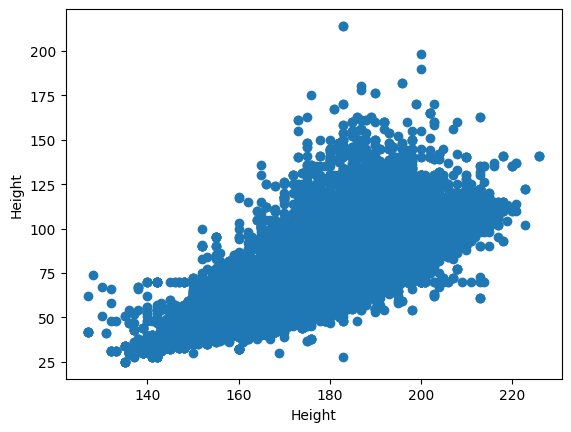

In [55]:
x = ath.Height
y = ath.Weight

plt.scatter(x,y)
plt.xlabel("Height")
plt.ylabel("Height")

*Q*. Show how many male & female has participated in the Olympics w.r.t the give dataset [PLOT]

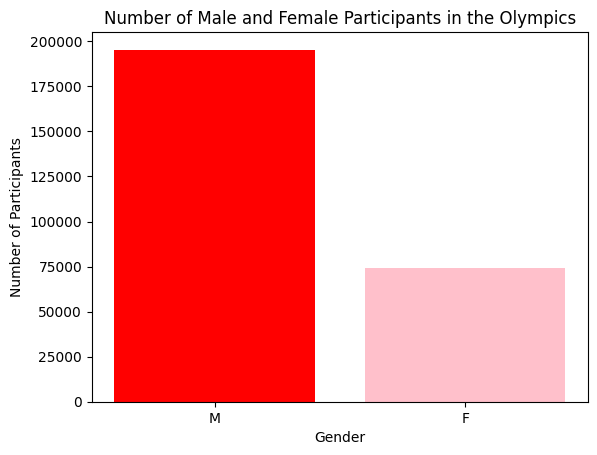

In [56]:
x = ath['Gender'].value_counts()

plt.bar(x.index, x.values, color = ["red","pink"])
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.title('Number of Male and Female Participants in the Olympics')
plt.show()

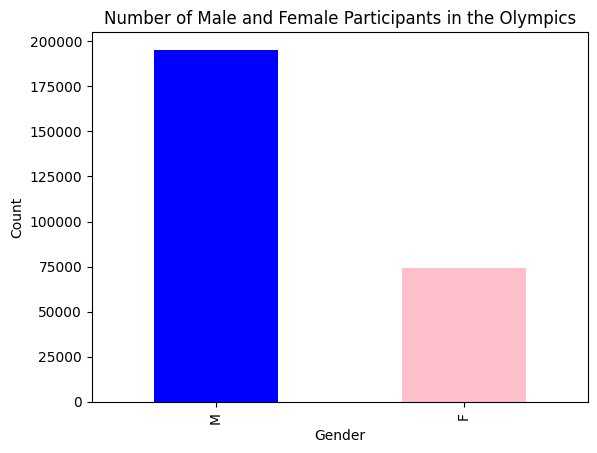

In [57]:
x = ath['Gender'].value_counts()

x.plot(kind = 'bar', color = ['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Male and Female Participants in the Olympics')
plt.show()

*Q*. Show how many male & female have participated in the Summer & Winter Olympics

In [58]:
gender_season_counts = ath.groupby(['Gender', 'Season']).size().unstack()
gender_season_counts

Season,Summer,Winter
Gender,,
F,59299,15079
M,161868,33485


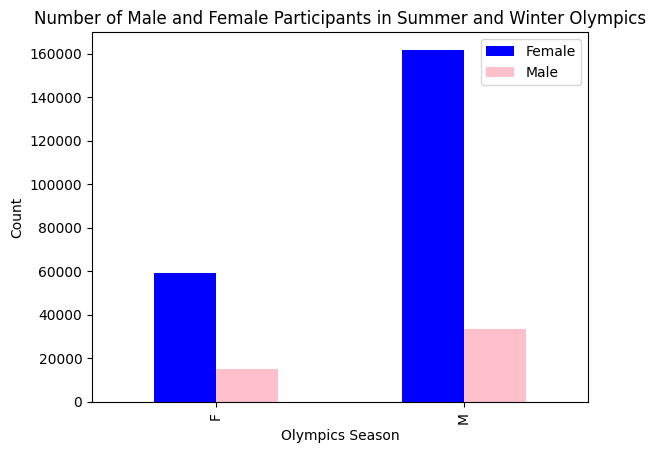

In [59]:
x = gender_season_counts

x.plot(kind='bar', stacked=False, color=['blue', 'pink'])
plt.xlabel('Olympics Season')
plt.ylabel('Count')
plt.title('Number of Male and Female Participants in Summer and Winter Olympics')
plt.legend(['Female', 'Male'])
plt.show()

*Q*. Name the Top 5 Team who're having the most medals

In [60]:
medal_count = ath[['Team','Medal']]
medal_count.groupby(['Team'])['Medal'].sum().sort_values(ascending = False).head(5)

Team
United States    9476
Soviet Union     4560
Germany          3916
Great Britain    3409
France           3163
Name: Medal, dtype: int64

In [61]:
fig = px.histogram(ath.Medal, x = ath.Team)
fig.show()

*Q*.  How many medals did the Female athlete has won during the Summer Olympics


In [62]:
ath[ath['Gender']=='F'].groupby(['Season'])['Medal'].sum()['Summer']


18872

*Q*. Name all the cities where the 2012 Olympics has held

In [63]:
ath[ath['Year']==2012]['City'].unique()

array(['London'], dtype=object)

*Q*. Name all the athletes who has participated in the game 'Judo'

In [64]:
ath['Name'][ath['Sport']=="Judo"]

1                          A Lamusi
160                  M'Bairo Abakar
180                    Salim Abanoz
412            Mohamed Ali Abdelaal
435               Ahmed Abdelrahman
                    ...            
269468               Oleg Zurabiani
269533                  Goran uvela
269596              Zurab Zviadauri
269647    Claudia Antoinette Zwiers
269648    Claudia Antoinette Zwiers
Name: Name, Length: 3801, dtype: object